In this study, a simple potential flow in an open channel whose geometrical properties, boundary and
boundary conditions are specified is modeled within the scope of Computational Hydraulics Course in
the 2020-2021 academic year. Numerical calculations are made with python. You can access and edit
the codes written for this homework with your web browser by clicking the this link:
https://mybinder.org/v2/gh/bulutas/CompHydraulicsFinal.git/HEAD

In [ ]:
#Necessary Libraries installed
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


SIMPLE POTENTIAL FLOW WITH FINER GRID

In [ ]:
#U velocity
U=1
# Set the grid size
dx1 = 1
dy1 = 1
#Length of x and y axes
xl = 600
yl = 100
h=yl
# Create a function to get psi field
def get_num_psi(dx):
    # get the grid point number
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1
    # Initialise the mesh with zeros
    psi = np.zeros((imax, jmax))
    #Boundary conditions
    #Only the places with 1 are entered, the remaining places are default 0
    psi[:,0]=np.arange(0,101,1)*U #Left boundary
    psi[0, :] = U*h #Top Boundary
    psi[70:,400:]=0 #Step Boundary
    psi[:,600]=psi[:,599]  
 
    #psi[0,0:20]=1
    atol, iteration, sum_resid = 1e-5, 0, 1
    a, b, c, d, e = 1, 1, 1, 1, -4
    while sum_resid > atol:
        psi_in = psi[1:imax-1, 1:jmax-1]
        ij_field = np.fromfunction(lambda i, j: i+j, psi_in.shape)
        io, jo = np.where(ij_field%2 == iteration%2)
        i, j = io+1, jo+1
        cnt = len(i)
        resid = np.zeros(psi.shape)
        resid[i, j] = a*psi[i+1, j]+b*psi[i-1,j]+c*psi[i,j+1]+d*psi[i,j-1]+e*psi[i,j]
        psi[i, j] = psi[i, j]-resid[i, j]/e
        resid_m = np.sum(np.abs(resid))
        sum_resid = (sum_resid+resid_m)/cnt
        iteration += 1
        
    return psi
psi1=get_num_psi(1)
psi1[70:,400:]=0
psi1[:,600]=psi1[:,599]  

In [ ]:
psi1[70:,410:].shape

(31, 191)

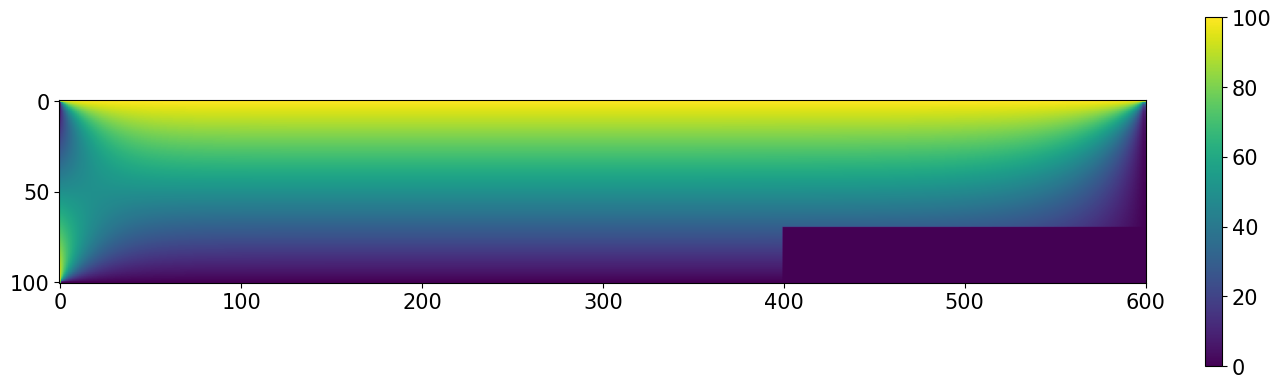

In [ ]:
plt.figure(figsize=(15, 10), dpi=100)
plt.rcParams.update({'font.size': 15})
im=plt.imshow(psi1)
plt.colorbar(im,fraction=0.015, pad=0.05)
plt.savefig("potentialfiner.pdf")


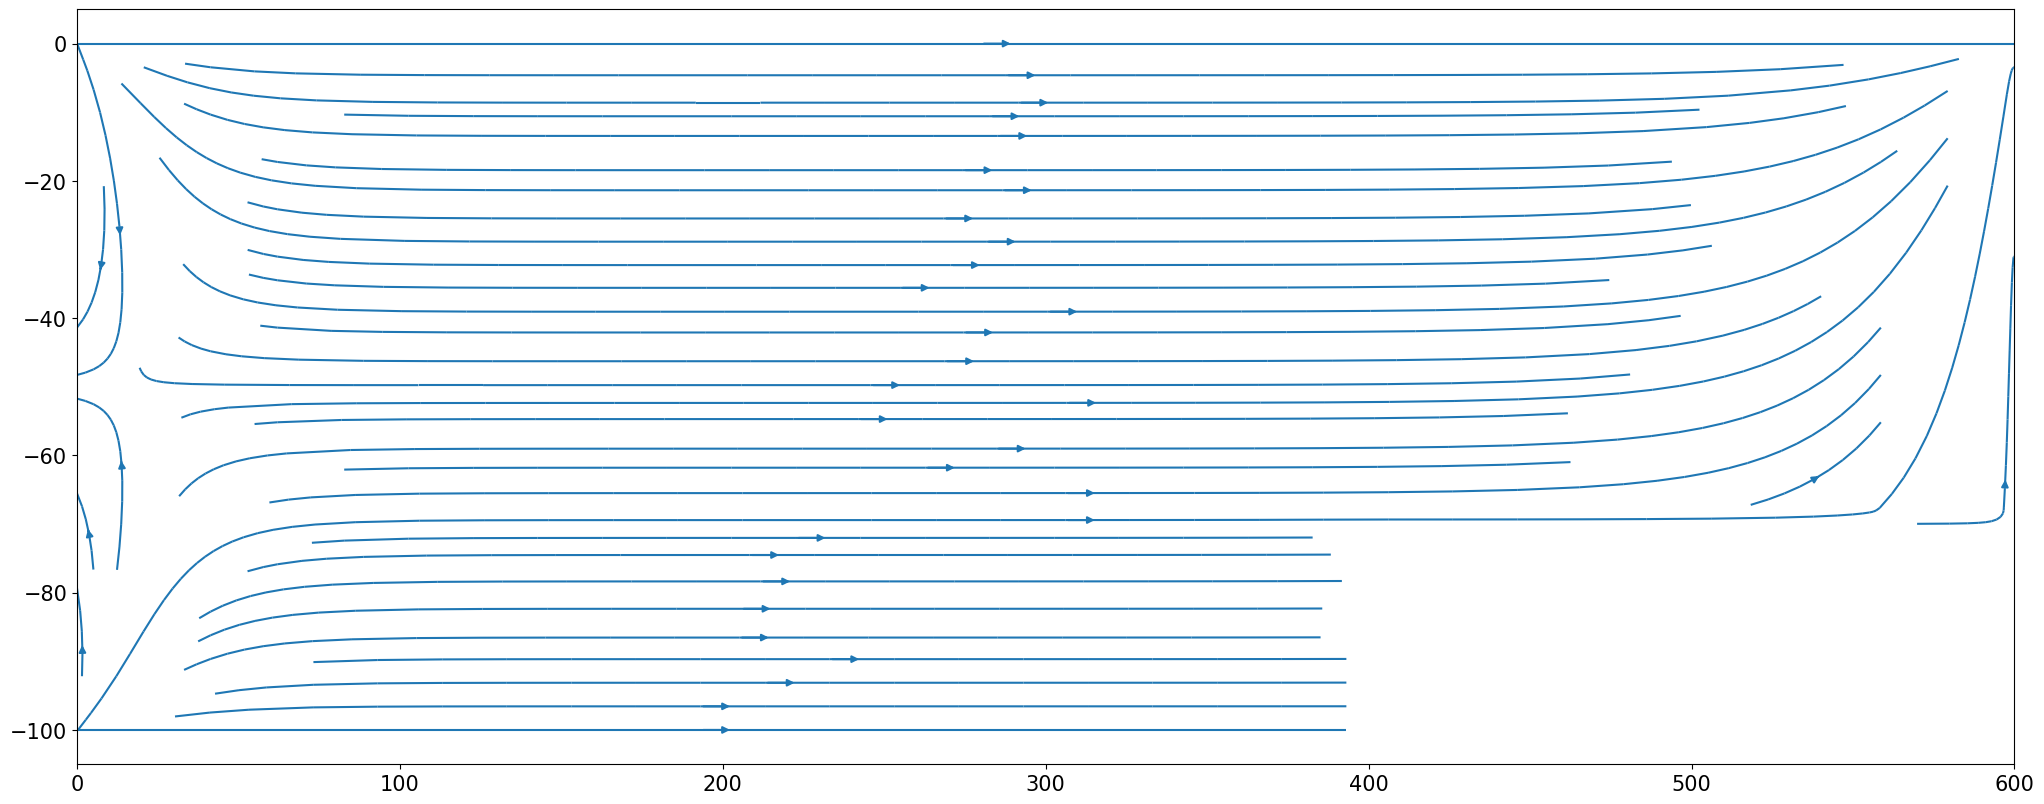

In [ ]:

plt.figure(figsize=(25, 10), dpi=100)
plt.rcParams.update({'font.size': 15})
u, v = np.gradient(psi1)
x=np.linspace(0,600,601)
y=np.linspace(0,-100,101)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, -u, -v)
plt.savefig("streamfiner.pdf")

In [ ]:
########################################################

SIMPLE POTENTIAL FLOW WITH COARSER GRID

In [ ]:
#U velocity
U=1
# Set the grid size
dx1 = 10
dy1 = 10
#Length of x and y axes
xl = 600
yl = 100
h=yl
# Create a function to get psi field
def get_num_psi(dx):
    # get the grid point number
    jmax = int(xl/dx)+1
    imax = int(yl/dx)+1
    # Initialise the mesh with zeros
    psi = np.zeros((imax, jmax))
    #Boundary conditions
    
    #Only the places with 1 are entered, the remaining places are default 0
    psi[:,0]=[10,20,30,40,50,60,70,80,90,100,0]
    psi[0, :] = U*h #Top Boundary
    psi1[7:,41:]=0 #Step boundary
    psi1[:,60]=psi1[:,59]  
    atol, iteration, sum_resid = 1e-5, 0, 1
    a, b, c, d, e = 1, 1, 1, 1, -4 #Five points operator coefficients
    while sum_resid > atol:
        psi_in = psi[1:imax-1, 1:jmax-1]
        ij_field = np.fromfunction(lambda i, j: i+j, psi_in.shape)
        io, jo = np.where(ij_field%2 == iteration%2)
        i, j = io+1, jo+1
        cnt = len(i)
        resid = np.zeros(psi.shape)
        resid[i, j] = a*psi[i+1, j]+b*psi[i-1,j]+c*psi[i,j+1]+d*psi[i,j-1]+e*psi[i,j]
        psi[i, j] = psi[i, j]-resid[i, j]/e
        resid_m = np.sum(np.abs(resid))
        sum_resid = (sum_resid+resid_m)/cnt
        iteration += 1
        
    return psi
psi1=get_num_psi(10)
psi1[7:,41:]=0
psi1[:,60]=psi1[:,59]  

In [ ]:
psi1[7:,41:].shape

(4, 20)

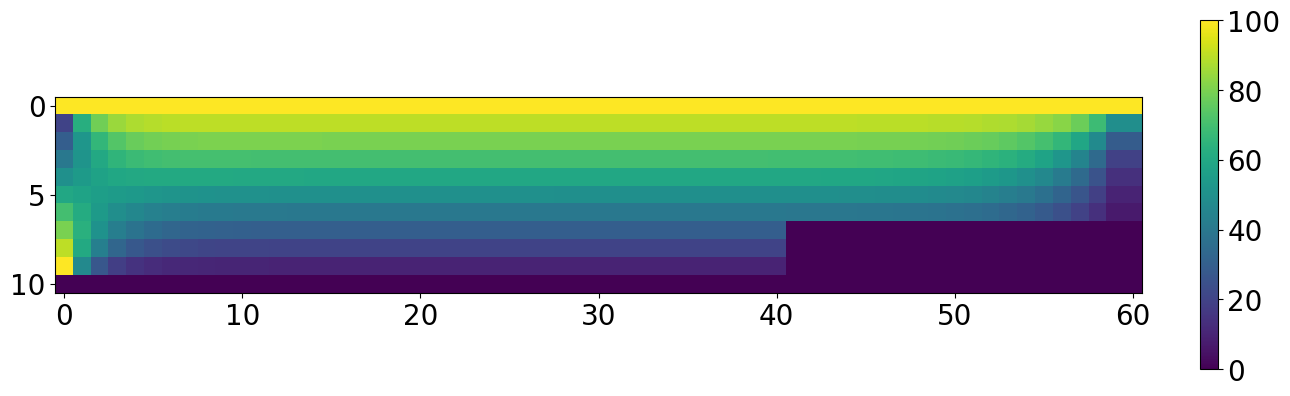

In [ ]:
plt.figure(figsize=(15, 10), dpi=100)
plt.rcParams.update({'font.size': 20})
im=plt.imshow(psi1)
plt.colorbar(im,fraction=0.015, pad=0.05)
plt.savefig("potentialcoarser.pdf")

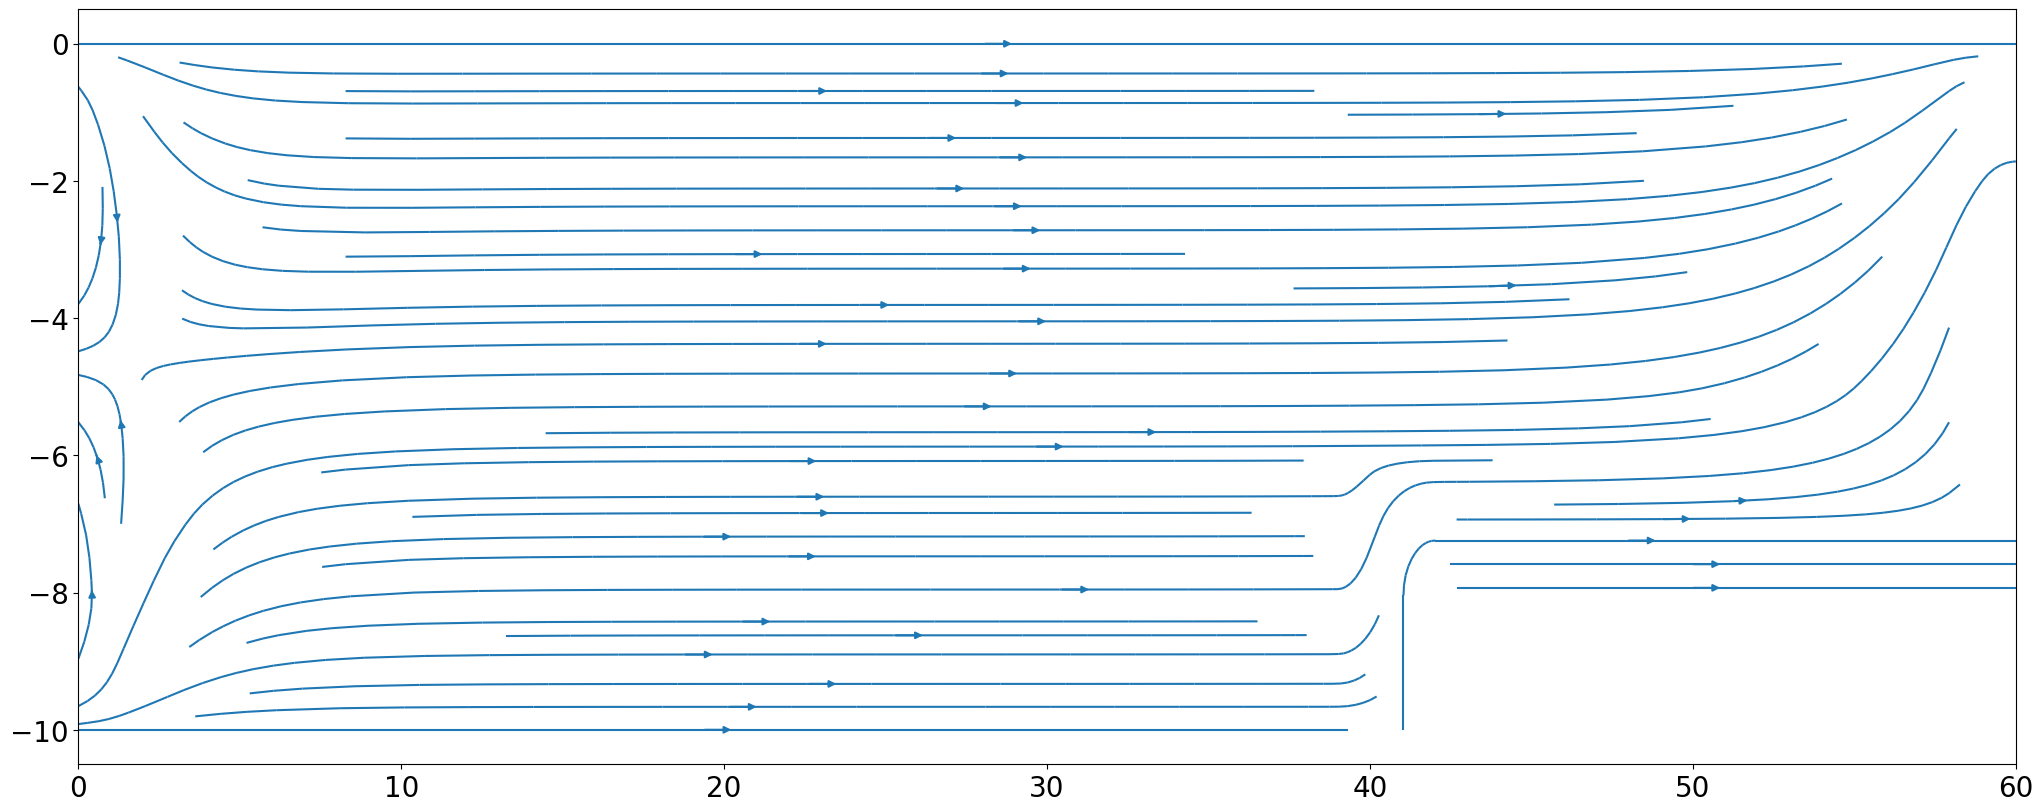

In [ ]:

plt.figure(figsize=(25, 10), dpi=100)
plt.rcParams.update({'font.size':20})
u, v = np.gradient(psi1)
x=np.linspace(0,60,61)
y=np.linspace(0,-10,11)
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, -u, -v)
plt.savefig("streamcoarser.pdf")